# Melbourne Housing Price Prediction using Decision Tree Regressor 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("melb_data.csv")

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
data.isnull().sum()
data = data.dropna(axis=0,how='any')
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [17]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**Decision Tree Regression**

In [18]:
y = data['Price']     #Prediction Target

In [19]:
x = data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]

In [20]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


In [21]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


In [22]:
train_x,val_x,train_y,val_y = train_test_split(x,y,random_state=0)

In [23]:
model = DecisionTreeRegressor()

model.fit(train_x,train_y)

DecisionTreeRegressor()

In [37]:
b=model.predict(train_x)
print(b)

[1335000.  590000. 1420000. ... 1020000.  760000. 1225000.]


In [24]:
a = model.predict(val_x)
print(a)

[1325000.  955000.  571000. ... 1400000.  819000. 1285000.]


### Evaluation Metrics

In [33]:
#Test data
print('mae=',mean_absolute_error(val_y,a))

mae= 244662.94560628376


In [38]:
#Training data
print('mae=',mean_absolute_error(train_y,b))

mae= 887.206676485027


In [41]:
#Test data
print('mse=', metrics.mean_squared_error(val_y,a))

mse= 190131143730.95523


In [39]:
#Training data
print('mse=', metrics.mean_squared_error(train_y,b))

mse= 77283771.88676159


In [31]:
#Test data
print('rmse=', np.sqrt(metrics.mean_squared_error(val_y,a)))

rmse= 436040.3005812137


In [40]:
#Training data
print('rmse=', np.sqrt(metrics.mean_squared_error(train_y,b)))

rmse= 8791.118921204603


# Predict the marks based on  hours of study using Support Vector Regression

In [ ]:
Predict the marks of a student based on his/her number of hours of study.

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
marks_df = pd.read_csv('SampleData.csv')
X = marks_df.iloc[:, 0].values
y = marks_df.iloc[:, 1].values
# reshape y to a column vector using reshape(-1,1).
y = np.array(y).reshape(-1,1)
marks_df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [246]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))


In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [248]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\Faculty\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [283]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([73.23218883, 72.15652032, 81.08595889, 89.70533505, 67.57167005,
       72.1989025 , 59.33383082, 73.16179308, 61.48383428, 65.57864547,
       57.38404428, 73.11313965, 68.99438584, 80.52785858, 63.19389295,
       70.0328564 , 88.93266046, 81.71542639, 64.11908196, 66.03204562])

In [297]:
y_train1=y_train.reshape(-1)
y_train1

array([-1.74984428,  1.67581471,  0.46732531, -0.74791896, -1.2770067 ,
        0.37021758,  1.55394069,  0.22202084,  0.37909756, -1.40938966,
        1.53362047,  0.69054936, -0.57367894, -1.27675812, -0.21538463,
        1.05524416, -0.65528619, -0.38416642, -0.89032789, -0.03229448,
        1.00475931, -2.02475385, -1.27956897,  0.49692133,  0.180543  ,
       -0.16692441,  0.8725898 , -0.5549266 , -1.4310057 ,  1.63545934,
       -0.04854375, -0.32163637,  0.13548623,  0.75357708, -0.8381571 ,
       -0.85054551, -0.14463512,  0.78309945,  0.10926509,  1.50879256,
       -1.11541194, -1.11104906, -0.11790059, -0.45843606,  0.50297376,
        0.54036823,  1.19602266,  0.0925417 ,  1.42430688,  0.46850336,
       -1.79768014, -2.66651176, -0.42798163, -0.14119173,  1.71151479,
       -1.00224427,  0.22121292, -1.22856288, -1.18692938,  0.21794595,
       -0.05919921,  0.89018186,  0.53764091, -0.70156137, -0.16174092,
        0.9014313 , -0.44658889,  1.46933383, -0.74219   ,  1.75

In [294]:
y_train_p = regressor.predict(X_train)
#y_train_p = sc_y.inverse_transform(y_train_p)
y_train_p

array([-1.30014269,  0.88483558, -0.6801587 , -0.01147879, -1.14137434,
        0.7580149 ,  0.60289832,  0.67438972,  1.05459142, -1.28380479,
        1.22813076,  0.37316839,  0.22784438, -1.24853117,  0.30973467,
        0.31982552, -1.08864728, -0.07655649, -0.50418288, -0.13285771,
        0.83463919, -1.14870392, -0.39120904,  0.47797917,  0.78981155,
        0.09009969,  0.07198826,  0.32567744, -1.33059481,  0.67402943,
        0.25013756, -1.28997041,  0.61516811,  0.11023471, -0.70472431,
       -0.86181642,  0.08294536,  1.41351134, -0.42254855,  1.44216674,
       -0.31297734, -1.05229865,  0.88189328, -0.39604023,  0.22700732,
        0.5642052 , -0.24063988,  0.14859687,  1.32166958,  0.3683593 ,
       -0.89087121, -1.30590703, -0.74930519, -1.25928463,  1.45033396,
       -0.9023883 ,  0.20173062, -1.12848959, -0.78721622, -0.08024796,
        0.42445346,  0.50275379, -0.95953736, -0.45370078,  0.14860294,
        0.3277724 , -0.64935913,  1.36970088, -0.99494476,  1.37

In [285]:
df1 = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df1.head()

,Real Values,Predicted Values
0,59.108839,73.232189
1,84.742698,72.156520
2,95.455053,81.085959
3,95.244153,89.705335
4,48.847153,67.571670


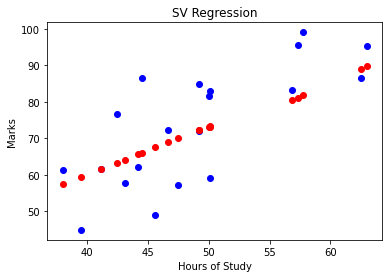

In [267]:
# Visualising the SVR outcome 
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'blue')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'red')
plt.title('SV Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

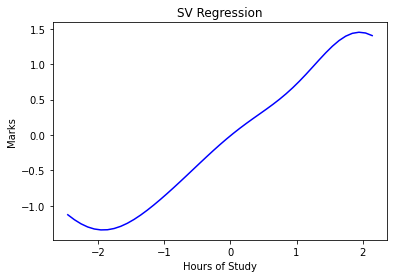

In [252]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SV Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

In [265]:
y_pred1 = regressor.predict(X_test)
y_pred2 = sc_y.inverse_transform(y_pred1.reshape(-1,1))
y_pred2

array([[73.23218883],
       [72.15652032],
       [81.08595889],
       [89.70533505],
       [67.57167005],
       [72.1989025 ],
       [59.33383082],
       [73.16179308],
       [61.48383428],
       [65.57864547],
       [57.38404428],
       [73.11313965],
       [68.99438584],
       [80.52785858],
       [63.19389295],
       [70.0328564 ],
       [88.93266046],
       [81.71542639],
       [64.11908196],
       [66.03204562]])

In [254]:
y_test1=sc_y.inverse_transform(y_test)
y_test1

array([[59.10883927],
       [84.74269781],
       [95.45505292],
       [95.2441528 ],
       [48.84715332],
       [72.11183247],
       [44.86249071],
       [82.90598149],
       [61.68403752],
       [62.00892325],
       [61.36690454],
       [81.53699078],
       [72.24725107],
       [83.14274979],
       [76.61734128],
       [57.25181946],
       [86.52053844],
       [99.05141484],
       [57.81251298],
       [86.64202032]])

In [275]:
#Test data
print('mae=',mean_absolute_error(y_test1,y_pred2))

mae= 9.22790434247856


In [276]:
#Test data
print('mse=', metrics.mean_squared_error(y_test1,y_pred2))

mse= 124.07415153147099


In [298]:
#Training data
print('mse=', metrics.mean_squared_error(y_train1,y_train_p))

mse= 0.38341573002649787


In [278]:
#Test data
print('rmse=', np.sqrt(metrics.mean_squared_error(y_test1,y_pred2)))

rmse= 11.138857730102805


C:\Users\Faculty\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


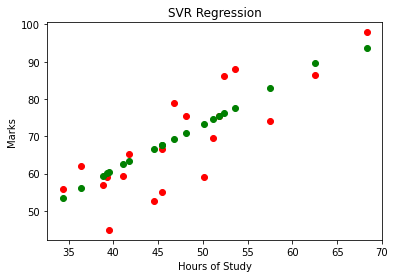

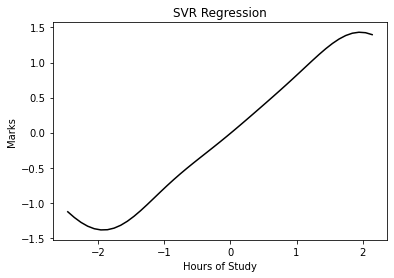

In [195]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

In [180]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,-1.431006,-1.433378
1,-1.115412,-0.338067
2,0.135486,0.563017
3,-0.048544,0.316521
4,0.408391,0.450026
5,0.717901,-0.407091
6,1.548543,0.552055
7,1.786336,0.579903
8,0.468503,0.411130
9,0.734447,0.528787


In [183]:
#Test data
print('mae=',mean_absolute_error(y_test,y_pred))

mae= 0.7130853901933305


In [184]:
#Test data
print('mse=', metrics.mean_squared_error(y_test,y_pred))

mse= 0.6928658314915521


In [181]:
#Test data
print('R2 Square=',metrics.r2_score(y_test,y_pred))

R2 Square= 0.3759467598338051


# Polynomial Regression

if the data points had the following non-linearity making the linear model giving an error in predictions due to non-linearity. In this case, we have to build a polynomial relationship which will accurately fit the data points in the given plot. This is called Polynomial Regression.building a Polynomial Regression model based on the non-linear data. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('PositionSalaries_Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [8]:
y_pred = lin_reg.predict(X_poly)

In [9]:
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


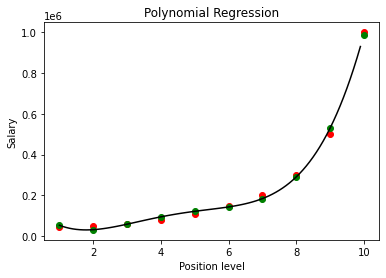

In [10]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
print(mean_absolute_error(y,y_pred))

12681.818181828345
